### 01. Import packages & data

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as rfc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/samsungData.txt',sep='|')

### 02. PCA using scikit-learn

In [4]:
pca = PCA(n_components=data.shape[1]-2)

In [5]:
pca.fit(data.ix[:,:-2])

PCA(copy=True, n_components=561, whiten=False)

In [6]:
components = {'pc'+str(id):pca.explained_variance_ratio_[id] for id in range(data.shape[1]-2)}

In [7]:
principle_components = pd.DataFrame.from_dict(components,orient='index')
principle_components.columns=['varExplained']
principle_components.sort_values(by='varExplained',
                                 ascending=False,
                                 inplace=True)


In [33]:
data_plot = principle_components
data_plot['component'] = data_plot.index
data_plot['totalVarExplained'] = data_plot.varExplained.cumsum(0)

In [34]:
data_plot.head()

,varExplained,component,totalVarExplained
pc0,0.625544,pc0,0.625544
pc1,0.049130,pc1,0.674675
pc2,0.041215,pc2,0.715889
pc3,0.018750,pc3,0.734639
pc4,0.016949,pc4,0.751587


#### Plot first n components

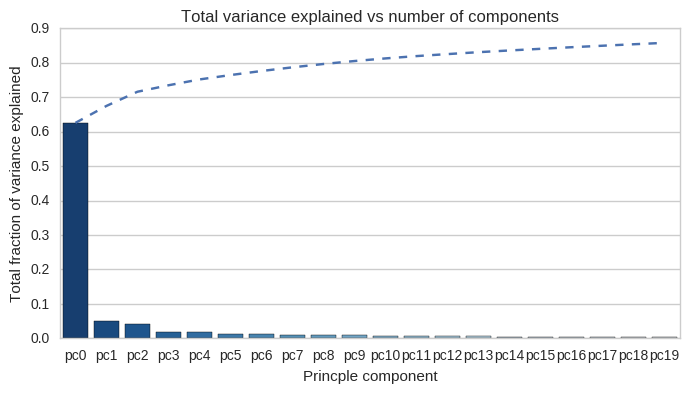

In [50]:
n = 20

sns.plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x='component',
            y='varExplained',
            data=data_plot.head(n),
            palette=sns.color_palette("Blues_r",
                                  n_colors=n))
plt.plot(range(n),
         data_plot.totalVarExplained[:n],'--')

sns.plt.xlabel('Princple component')
sns.plt.ylabel('Total fraction of variance explained')
sns.plt.title('Total variance explained vs number of components')